<a href="https://colab.research.google.com/github/sahealthsolutions/python_data_analysis_assignment/blob/main/DATA_PRE_PROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
users = pd.read_csv("/content/sample_data/users_data.csv")
cards = pd.read_csv("/content/sample_data/cards_data.csv")
transactions = pd.read_csv("/content/sample_data/transactions_data.csv")

print(users.shape, cards.shape, transactions.shape)


(25, 14) (75, 13) (50000, 12)


Basic Inspection

In [3]:
users.info()
cards.info()
transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 25 non-null     int64  
 1   current_age        25 non-null     int64  
 2   retirement_age     25 non-null     int64  
 3   birth_year         25 non-null     int64  
 4   birth_month        25 non-null     int64  
 5   gender             25 non-null     object 
 6   address            25 non-null     object 
 7   latitude           25 non-null     float64
 8   longitude          25 non-null     float64
 9   per_capita_income  25 non-null     object 
 10  yearly_income      25 non-null     object 
 11  total_debt         25 non-null     object 
 12  credit_score       25 non-null     int64  
 13  num_credit_cards   25 non-null     int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 2.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 

1. Ensure Numeric values for core continuous columns. If not numeric then
convert them into appropriate int and float datatypes.


In [4]:
# Users numeric columns
user_num_cols = [
    "current_age", "retirement_age", "birth_year", "birth_month",
    "per_capita_income", "yearly_income", "total_debt",
    "credit_score", "num_credit_cards"
]

users[user_num_cols] = users[user_num_cols].apply(pd.to_numeric, errors="coerce")

# Cards numeric columns
cards["credit_limit"] = pd.to_numeric(cards["credit_limit"], errors="coerce")
cards["num_cards_issued"] = pd.to_numeric(cards["num_cards_issued"], errors="coerce")

# Transactions amount cleanup
transactions["amount"] = (
    transactions["amount"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .astype(float)
)


2. Check Data Hygiene throughout the data e.g. Turn “amount” column (with $
signs) into a clean number column. “$46.26” ---🡪 46.26

In [6]:
transactions["amount"] = (
    transactions["amount"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .astype(float)
)
print(transactions)

             id                 date  client_id  card_id  amount  \
0       7475509  2010-01-01 04:45:00       1718     4706   46.21   
1       7475582  2010-01-01 06:03:00        511      974    3.33   
2       7475752  2010-01-01 06:52:00       1718     2029   10.60   
3       7475819  2010-01-01 07:08:00        511     1038   21.50   
4       7475828  2010-01-01 07:09:00       1094     3755   80.00   
...         ...                  ...        ...      ...     ...   
49995  11865834  2012-10-29 10:45:00        153      107  137.14   
49996  11865927  2012-10-29 11:04:00       1718     5144   12.09   
49997  11866093  2012-10-29 11:42:00        153      107   43.31   
49998  11866339  2012-10-29 12:33:00       1116      301  124.76   
49999  11866448  2012-10-29 12:55:00       1116       79    7.30   

                 use_chip  merchant_id  merchant_city merchant_state      zip  \
0      Online Transaction        15143         ONLINE            NaN      NaN   
1       Swipe Transac

3. Check how many duplicate rows are there, handle them.

In [7]:
print("Duplicates before:")
print(users.duplicated().sum(), cards.duplicated().sum(), transactions.duplicated().sum())

users.drop_duplicates(inplace=True)
cards.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)


Duplicates before:
0 0 0


4. Display number and columns having missing values. Also visualize and then
finally handle them with appropriate action.

In [8]:
print(users.isnull().sum())
print(cards.isnull().sum())
print(transactions.isnull().sum())


id                    0
current_age           0
retirement_age        0
birth_year            0
birth_month           0
gender                0
address               0
latitude              0
longitude             0
per_capita_income    25
yearly_income        25
total_debt           25
credit_score          0
num_credit_cards      0
dtype: int64
id                        0
client_id                 0
card_brand                0
card_type                 0
card_number               0
expires                   0
cvv                       0
has_chip                  0
num_cards_issued          0
credit_limit             75
acct_open_date            0
year_pin_last_changed     0
card_on_dark_web          0
dtype: int64
id                    0
date                  0
client_id             0
card_id               0
amount                0
use_chip              0
merchant_id           0
merchant_city         0
merchant_state     8008
zip                8358
mcc                   0
errors    

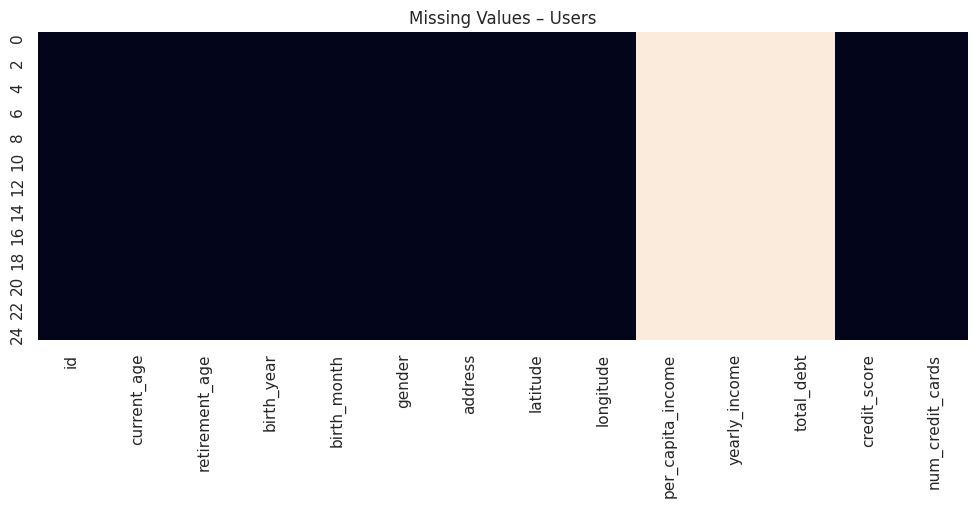

In [9]:
plt.figure(figsize=(12,4))
sns.heatmap(users.isnull(), cbar=False)
plt.title("Missing Values – Users")
plt.show()


In [12]:
# Simple imputation
users.fillna(users.median(numeric_only=True), inplace=True)
cards.fillna(cards.median(numeric_only=True), inplace=True)
transactions.fillna("Unknown", inplace=True)


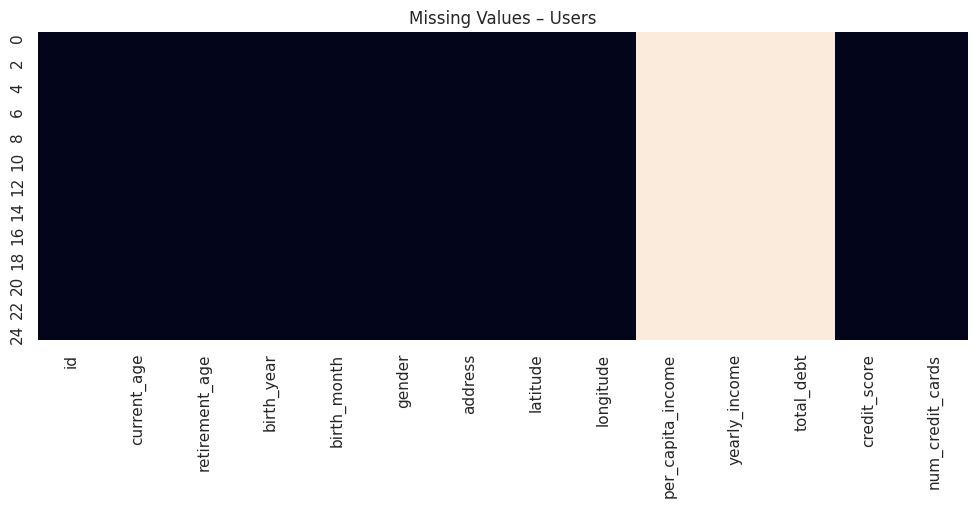

In [13]:
plt.figure(figsize=(12,4))
sns.heatmap(users.isnull(), cbar=False)
plt.title("Missing Values – Users")
plt.show()

4. Convert the use_chip column to have only three values: swipe, chip, or online.

In [14]:
transactions["use_chip"] = transactions["use_chip"].str.lower()

transactions["use_chip"] = transactions["use_chip"].replace({
    "yes": "chip",
    "no": "swipe",
    "online": "online"
})


6. How can you clean up city names, so they don’t have extra spaces and always
start with capital letters?
7. Make sure state codes are always two capital letters (like CA, NY)?
8. How do you turn ZIP codes into a proper 5-digit string, keeping leading zeros?

In [16]:
# City cleanup
transactions["merchant_city"] = (
    transactions["merchant_city"]
    .astype(str)
    .str.strip()
    .str.title()
)

# State cleanup
transactions["merchant_state"] = (
    transactions["merchant_state"]
    .astype(str)
    .str.strip()
    .str.upper()
    .str[:2]
)

# ZIP cleanup
transactions["zip"] = (
    transactions["zip"]
    .astype(str)
    .str.zfill(5)
)
print(transactions)

             id                 date  client_id  card_id  amount  \
0       7475509  2010-01-01 04:45:00       1718     4706   46.21   
1       7475582  2010-01-01 06:03:00        511      974    3.33   
2       7475752  2010-01-01 06:52:00       1718     2029   10.60   
3       7475819  2010-01-01 07:08:00        511     1038   21.50   
4       7475828  2010-01-01 07:09:00       1094     3755   80.00   
...         ...                  ...        ...      ...     ...   
49995  11865834  2012-10-29 10:45:00        153      107  137.14   
49996  11865927  2012-10-29 11:04:00       1718     5144   12.09   
49997  11866093  2012-10-29 11:42:00        153      107   43.31   
49998  11866339  2012-10-29 12:33:00       1116      301  124.76   
49999  11866448  2012-10-29 12:55:00       1116       79    7.30   

                 use_chip  merchant_id  merchant_city merchant_state      zip  \
0      online transaction        15143         Online             UN  Unknown   
1       swipe transac

In [18]:
transactions.describe()

,id,client_id,card_id,amount,merchant_id,mcc
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,9.640848e+06,1140.038120,3362.172920,51.639874,44314.609300,5461.989660
std,1.270299e+06,565.097749,1787.512077,108.735885,26791.661229,912.641712
min,7.475509e+06,68.000000,27.000000,-500.000000,16.000000,1711.000000
25%,8.536577e+06,708.000000,2029.000000,13.200000,20519.000000,4829.000000
50%,9.620379e+06,1116.000000,3754.000000,35.390000,39021.000000,5499.000000
75%,1.074005e+07,1718.000000,4706.000000,74.962500,68671.000000,5812.000000
max,1.186645e+07,1946.000000,5956.000000,6820.200000,100232.000000,9402.000000


In [19]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              50000 non-null  int64  
 1   date            50000 non-null  object 
 2   client_id       50000 non-null  int64  
 3   card_id         50000 non-null  int64  
 4   amount          50000 non-null  float64
 5   use_chip        50000 non-null  object 
 6   merchant_id     50000 non-null  int64  
 7   merchant_city   50000 non-null  object 
 8   merchant_state  50000 non-null  object 
 9   zip             50000 non-null  object 
 10  mcc             50000 non-null  int64  
 11  errors          50000 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 4.6+ MB
